In [97]:
import numpy as np
import scipy as sp
import scipy.io
import matplotlib.pyplot as plt
import os
from neurodsp import spectral, sim

In [98]:
filename = 'emodat-Copy1.mat'
file = scipy.io.loadmat(filename)
n = 100
x = file['data']
x = x[0]
x = x[0:n]

In [99]:
oscA = sim.sim_oscillator(20, 10, .2, rdsym=.5)

In [100]:
#delta function group
k1 = 3
k2 = 0.3
delt_function = np.array([0,0,0,0,1,0,0,0,0])
first_difference = np.array([0,0,0,0,1,-1,0,0,0])
amplifier_function = k1*delt_function
attenuator_function = k2*delt_function
echo_function = delt_function + np.roll(attenuator_function,3)

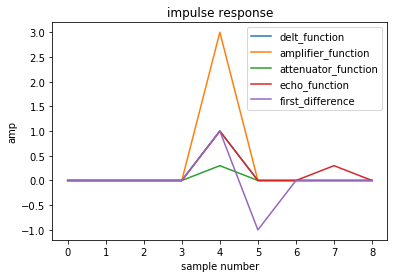

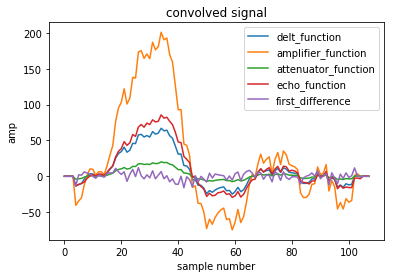

In [101]:
plt.figure(1)
plt.plot(delt_function,label = 'delt_function')
plt.plot(amplifier_function,label = 'amplifier_function')
plt.plot(attenuator_function,label = 'attenuator_function')
plt.plot(echo_function,label = 'echo_function')
plt.plot(first_difference,label = 'first_difference')
plt.xlabel('sample number')
plt.ylabel('amp')
plt.title('impulse response')
plt.legend()
plt.show()
plt.figure(2)
plt.plot(np.convolve(x,delt_function), label = 'delt_function')
plt.plot(np.convolve(x,amplifier_function), label = 'amplifier_function')
plt.plot(np.convolve(x,attenuator_function), label = 'attenuator_function')
plt.plot(np.convolve(x,echo_function), label = 'echo_function')
plt.plot(np.convolve(x,first_difference), label = 'first_difference')
plt.xlabel('sample number')
plt.ylabel('amp')
plt.title('convolved signal')
plt.legend()
plt.show()

In [147]:
#Recursive first difference and running sum functions
def first_diff(input_signal):
    y = np.zeros(len(input_signal))
    y[0] = 0
    for i in range(1,len(input_signal)):
        y[i] = input_signal[i]-y[i-1]
    return y
def run_sum(input_signal):
    y = np.zeros(len(input_signal))
    for i in range(1,len(input_signal)):
        y[i]=y[i-1]+x[i]
    return y 

In [148]:
z = first_diff(x)
r = run_sum(z)

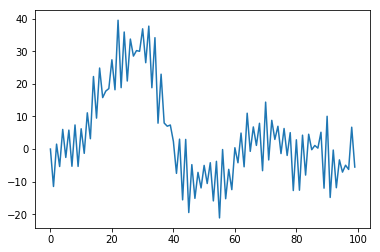

In [150]:
plt.plot(z)

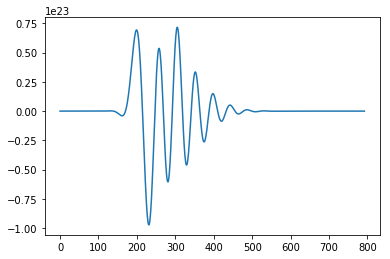

In [157]:
#testing the central limit theorem
s = (np.convolve(x,x))
for i in range(0,2):
    s = np.convolve(s,s)
plt.plot(s)

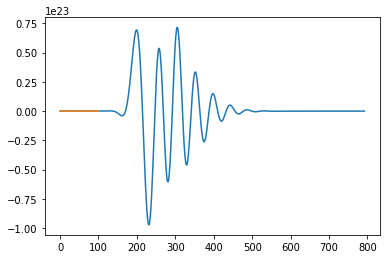

In [158]:
plt.plot(s)
plt.plot(x)